In [ ]:
import numpy as np
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import sys

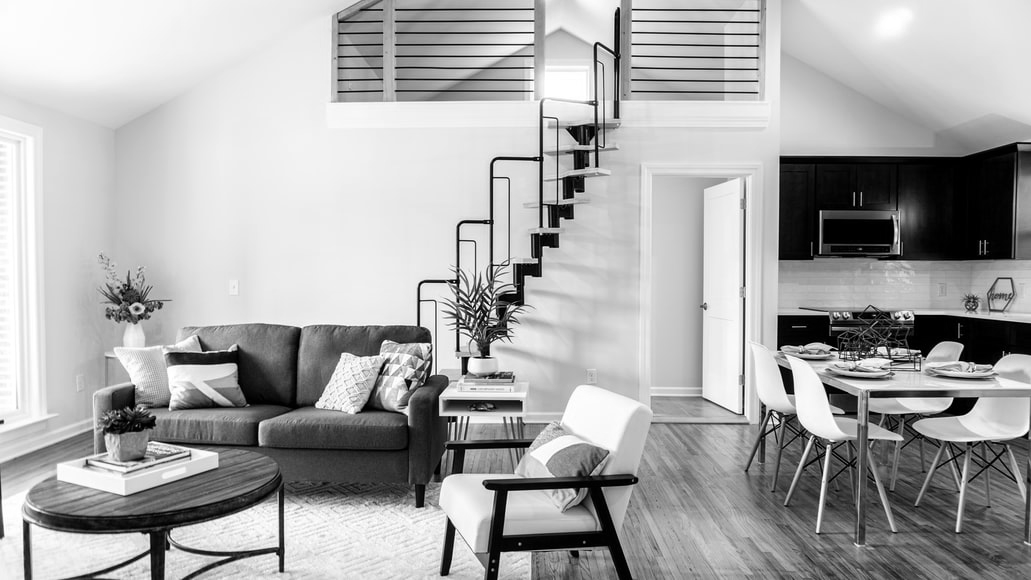

In [ ]:
url = "https://images.unsplash.com/photo-1611216212569-d739dbe9ed40?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1031&q=80"
image = io.imread(url)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
m,n = gray_image.shape
img=gray_image
ct= np.empty(shape=(m,n),dtype='uint8')

#Histogram Stretching

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<StemContainer object of 3 artists>

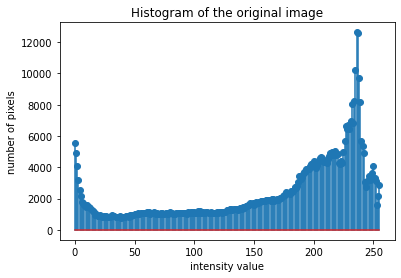

In [ ]:
# find frequency of pixels in range 0-255 
img=np.uint8(img)
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
# plotting the histogram 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram of the original image') 
plt.stem(histr) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


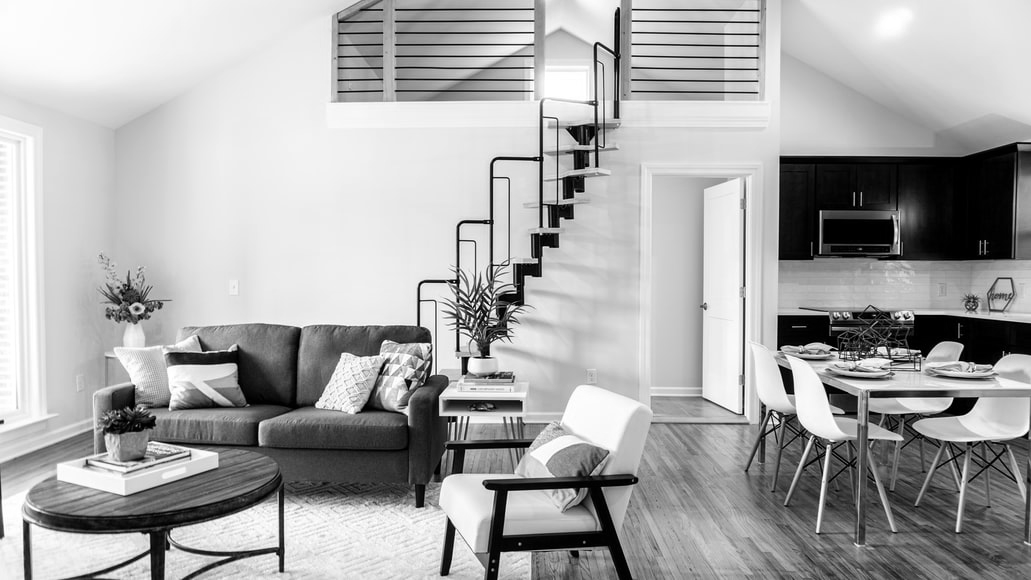

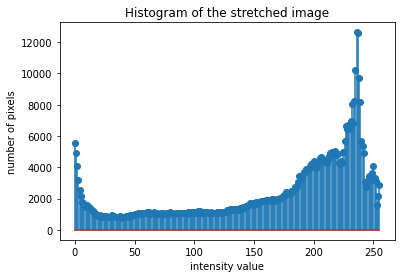

In [ ]:
# Transformation to obtain stretching 
constant = (255-0)/(img.max()-img.min()) 
img_stretch = img * constant 
img1=np.uint8(img_stretch)
histr1 = cv2.calcHist([img1],[0],None,[256],[0,256]) 
# plotting the histogram 
plt.stem(histr1) 
plt.xlabel('intensity value') 
plt.ylabel('number of pixels') 
plt.title('Histogram of the stretched image') 
   
# Storing stretched Image 
cv2.imwrite('Stretched Image 4.png', img_stretch) 
cv2_imshow(img_stretch)

#Histogram Equalization

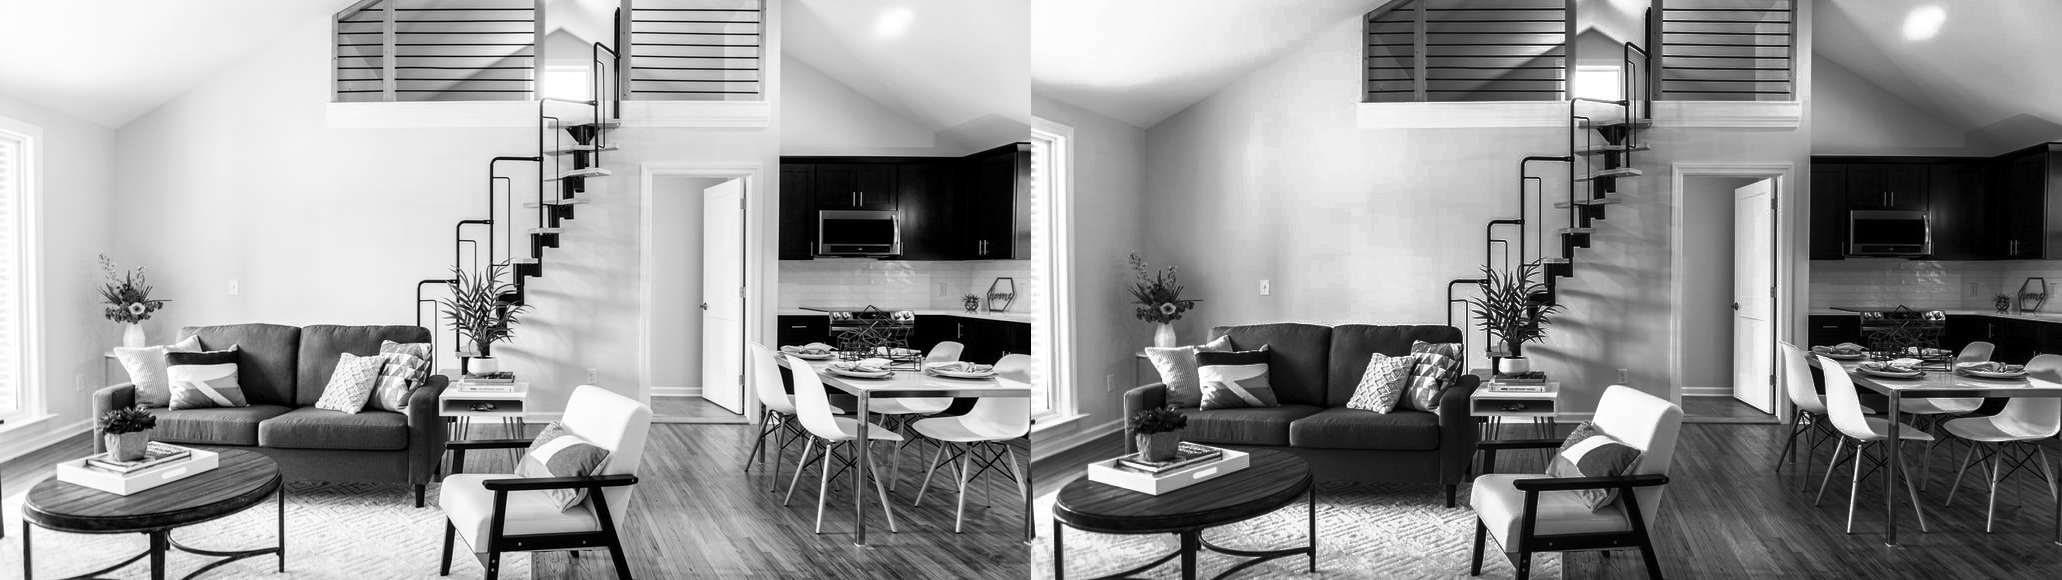

In [ ]:
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
cv2_imshow(res)

#Histogram Matching (Histogram Specification)

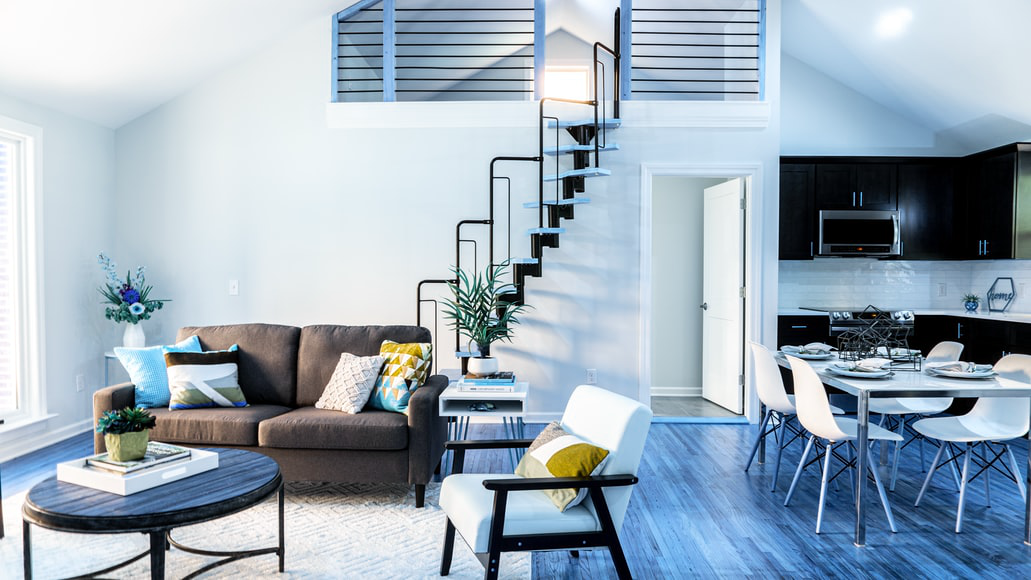

In [ ]:
url = "https://images.unsplash.com/photo-1611216212569-d739dbe9ed40?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1031&q=80"
image = io.imread(url)
lena = image
cv2_imshow(lena)

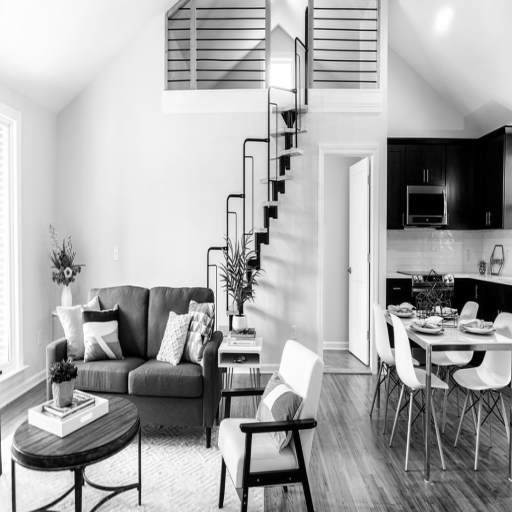

In [ ]:
url = "https://images.unsplash.com/photo-1611216212569-d739dbe9ed40?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1031&q=80"
image = io.imread(url)
ascent = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
dim = (512,512)
# resize image
resized = cv2.resize(ascent, dim, interpolation = cv2.INTER_AREA)
 
ascent=resized
cv2_imshow(ascent)

Source


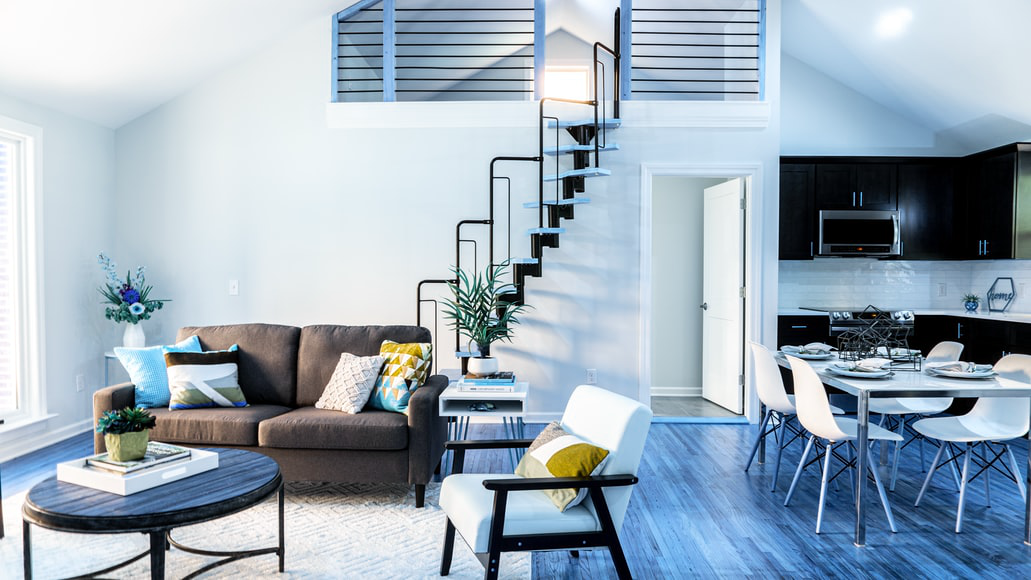

In [ ]:
def hist_match(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image.
    Code adapted from
    http://stackoverflow.com/questions/32655686/histogram-matching-of-two-images-in-python-2-x
    Arguments:
    -----------
        source: np.ndarray
            Image to transform; the histogram is computed over the flattened
            array
        template: np.ndarray
            Template image; can have different dimensions to source
    Returns:
    -----------
        matched: np.ndarray
            The transformed output image
    """

    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)



from matplotlib import pyplot as plt

source = lena
template = ascent
matched = hist_match(template, source)
print("Source")
cv2_imshow(source)




Template


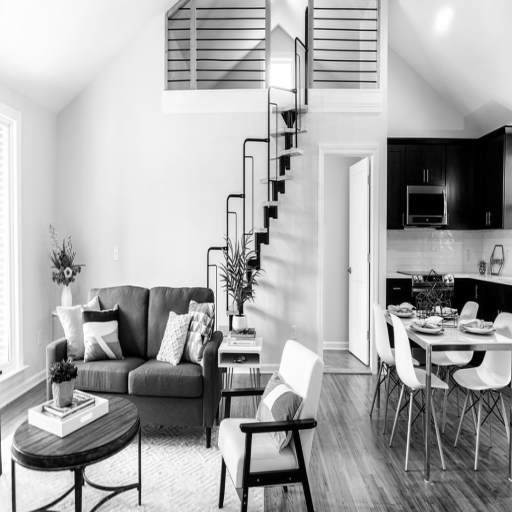

In [ ]:
print("Template")
cv2_imshow(template)

Matched


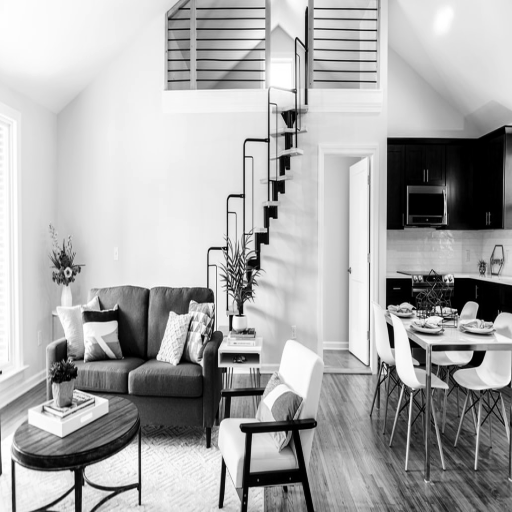

In [ ]:
print("Matched")
cv2_imshow(matched)